## Convolutional Autoencoder
- Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better

### Import required libraries

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
from keras.models import Model

### Load the Data from Mnist Digits

In [16]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Plot Random Image

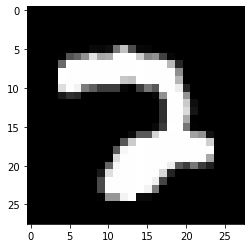

In [17]:
plt.imshow(x_train[120])
plt.gray()

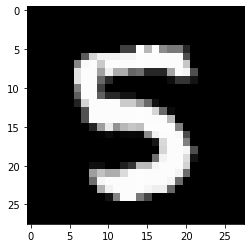

In [18]:
plt.imshow(x_test[120])
plt.gray()

### Create Auto-Encoder Model with encoding and decoding blocks

In [12]:
#Create Encoder
input_img = Input(shape=(28, 28, 1))

encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

#Create Decoder
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
decoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(16, (3, 3), activation='relu')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input_img, decoded)

#Compile layer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Summary
autoencoder.summary()

### Fit and train the model

In [13]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 92s 192ms/step - loss: 0.2043 - val_loss: 0.1487
Epoch 2/50
469/469 [==============================] - 89s 190ms/step - loss: 0.1376 - val_loss: 0.1268
Epoch 3/50
469/469 [==============================] - 86s 184ms/step - loss: 0.1224 - val_loss: 0.1167
Epoch 4/50
469/469 [==============================] - 87s 185ms/step - loss: 0.1153 - val_loss: 0.1115
Epoch 5/50
469/469 [==============================] - 89s 191ms/step - loss: 0.1110 - val_loss: 0.1084
Epoch 6/50
469/469 [==============================] - 89s 190ms/step - loss: 0.1081 - val_loss: 0.1062
Epoch 7/50
469/469 [==============================] - 91s 193ms/step - loss: 0.1061 - val_loss: 0.1048
Epoch 8/50
469/469 [==============================] - 88s 187ms/step - loss: 0.1045 - val_loss: 0.1025
Epoch 9/50
469/469 [==============================] - 89s 189ms/step - loss: 0.1032 - val_loss: 0.1012
Epoch 10/50
469/469 [==============================] - 88s 187ms/step - l

### Plot Original and Decoded Images

In [14]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 5s 15ms/step


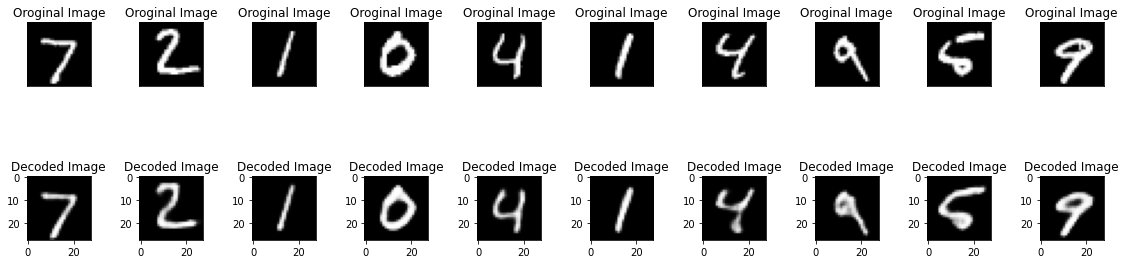

In [15]:
plt.figure(figsize=(40, 4))
for i in range(10):
    ax=plt.subplot(3,20, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Oroginal Image")
    
    plt.subplot(3,20, i+1+2*20)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Decoded Image") 
plt.show()